In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import scipy.stats as stats
import os
import sys
import seaborn as sns
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils
%matplotlib inline

## CSC 217 - Fall 2019 Final

# YOU PROBABLY WANT TO SKIM THIS SECTION AND START THE TEST IMMEDIATELY BECAUSE YOU LOVE STATS SO MUCH. WHILE I UNDERSTAND YOUR ENTHUSIASM, I SUGGEST YOU TAKE TEN MINUTES TO READ THIS SECTION, UNDERSTAND THE DATA, AND READ THIS SECTION AGAIN.

For your final exam you will be looking at two closely related datasets, each pulled from the website *FiveThirtyEight*. Both contain polling data for the upcoming Democratic primary election. The first contains polling data from the state of Iowa, while the second contains polling data from the state of New Hampshire.

In each poll a random set of people are asked - if the Democratic primary were today, would you vote for this candidate? The responses are the percentage of people asked who would vote for the four candidates listed - Joe Biden, Pete Buttigieg, Bernie Sanders and Elizabeth Warren.

Both datasets have the same column structure. In each dataset, every row represents an individual poll from a certain point in time (sometime between the beginning of this year and now).

Column structure:  

**date**: the date that poll was taken  
**days**: the number of days between January 1st and the date of that poll. For instance, if a poll was taken on February 2, 2019, the 'days' column will contain the number '32', meaning that there is a 32 day difference between January 1, 2019 and Feburary 2, 2019.  
**state**: the state that poll was taken in  
**Biden**: the percentage of people polled who said that they would vote for Joe Biden in the Democratic primary  
**Buttigieg**: the percentage of people polled who said that they would vote for Pete Buttigieg in the Democratic primary  
**Sanders**: the percentage of people polled who said that they would vote for Bernie Sanders in the Democratic primary  
**Warren**: the percentage of people polled who said that they would vote for Elizabeth Warren in the Democratic primary  

The data DOES NOT need to be cleaned beyond what has been provided.

**Please note** that any questions that reference "all of the candidates" means that you should be looking at the four candidates in the dataset: Biden, Buttigieg, Sanders and Warren.

Please write out your answer as well as any necessary code required for each question. Note that you may use the utils package, as it's imported above.

There are 15 total questions and a bonus question. There are 70 possible points - the maximum score possible is 75/70 after the bonus question. Partial credit may be awarded on questions under my discretion.

The exam is due to me (via email - eagovino@ccny.cuny.edu) by **9 PM**. Late submissions will not be accepted.

Good luck and please reach out to me via email or Slack (preferably Slack) with questions.

In [2]:
iowa = pd.read_csv('data/iowa.csv')
new_hampshire = pd.read_csv('data/new_hampshire.csv')

In [3]:
iowa.head()

,date,days,state,Biden,Buttigieg,Sanders,Warren
0,2019-02-02,32,Iowa,29.20,0.0,14.80,10.6
1,2019-02-07,37,Iowa,25.39,11.4,10.38,10.5
2,2019-03-09,67,Iowa,27.00,1.0,25.00,9.0
3,2019-03-20,78,Iowa,29.00,11.4,15.00,8.0
4,2019-03-24,82,Iowa,25.30,11.4,24.10,8.5


In [4]:
new_hampshire.head()

,date,days,state,Biden,Buttigieg,Sanders,Warren
0,2019-01-06,5,New Hampshire,24.00,11.4,26.00,11.00
1,2019-01-28,27,New Hampshire,22.00,11.4,17.00,17.00
2,2019-02-07,37,New Hampshire,21.94,11.4,12.85,8.67
3,2019-02-20,50,New Hampshire,28.00,11.4,20.00,9.00
4,2019-02-23,53,New Hampshire,25.00,0.7,26.80,8.70


1. How many polls are in each dataset? (3 points)

In [5]:
#Number of polls = column length here
iowa.shape

(37, 7)

37 polls are in the Iowa dataset.

In [6]:
new_hampshire.shape

(42, 7)

42 polls are in the New Hampshire sataset.

2. Which candidate has the highest mean polling results in Iowa? (3 points)

In [7]:
iowa.mean()

days         210.108108
Biden         21.888919
Buttigieg     13.389189
Sanders       15.985946
Warren        17.094595
dtype: float64

Biden has the highest mean polling of 21.888919% in Iowa.

3. In New Hampshire, Bernie Sanders' polling results represent roughly a normal distribution with a mean of 18.97% and a standard deviation of 5.87%.

Say that a new poll comes out tomorrow. Assuming that the new poll is part of this distribution, what is the probability that this new poll will show the percentage of people who want to vote for Bernie Sanders at 30% or more? (6 points)

In [8]:
#This is a normal distribution
mean = new_hampshire["Sanders"].mean()
std = new_hampshire["Sanders"].std()
dist = stats.norm(mean,std)

In [9]:
1 - dist.cdf(30)

0.03037452046190181

4. Say we want to see if any of the candidates have a statistically *different* mean polling result in Iowa from the others and want to do so by running an ANOVA test. In this case, what is the null hypothesis? What is the alternate hypothesis? (4 points)

H0: candidates have no statistically different mean polling results in Iowa from the others.
H1: candidates have a statistically different mean polling result in Iowa from the others.

5. What is the resulting p-value from the ANOVA test? (4 points)

In [10]:
F, p = stats.f_oneway(iowa["Biden"], iowa["Buttigieg"], iowa["Sanders"], iowa["Warren"])
print('F-statistic:', np.round(F, 2))
print('p-value:', np.round(p, 2))

F-statistic: 14.03
p-value: 0.0


6. Given the number of degrees of freedom required for this test, what is the F-score that consitutes the rejection cutoff for this test (meaning that we will reject our null hypothesis if our F-score is above this value)? (*Hint*: note the F-distribution used in an ANOVA test requires two separate inputs for degrees of freedom) (6 points)

dfn = [4 (candidates)-1]=3, dfd = [37 (total samples)-4(number of distributions/candidates)] = 33

14.03 from previous answer

7. Find the polling results for Pete Buttigieg for Iowa and New Hampshire. What is the difference between his mean polling results in Iowa minus his mean polling results in New Hampshire? (4 points)

In [11]:
#Polling result Iowa
iowa["Buttigieg"].head()

0     0.0
1    11.4
2     1.0
3    11.4
4    11.4
Name: Buttigieg, dtype: float64

In [12]:
#Polling result New Hampshire
new_hampshire["Buttigieg"].head()

0    11.4
1    11.4
2    11.4
3    11.4
4     0.7
Name: Buttigieg, dtype: float64

In [13]:
#Difference in mean
iowa["Buttigieg"].mean() - new_hampshire["Buttigieg"].mean()

3.1739510939510946

8. Plot a boxplot showing the distributions of Buttigieg's polling results in Iowa and New Hampshire. Do either of the distributions have outliers? If so, which values are outliers? (4 points)

{'whiskers': [<matplotlib.lines.Line2D at 0x7efde305a6d8>,
 'caps': [<matplotlib.lines.Line2D at 0x7efde305af60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7efde305a160>,
 'medians': [<matplotlib.lines.Line2D at 0x7efde306a860>,
 'fliers': [<matplotlib.lines.Line2D at 0x7efde306acc0>,
 'means': []}

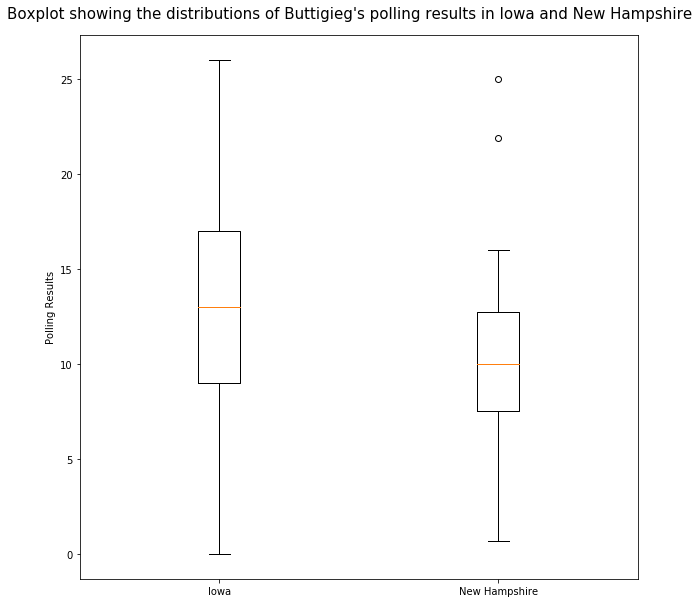

In [14]:
fig = plt.figure(figsize=(10,10))
plt.ylabel('Polling Results')
fig.suptitle("Boxplot showing the distributions of Buttigieg's polling results in Iowa and New Hampshire", fontsize=15, y=0.92)
plt.boxplot([iowa["Buttigieg"], new_hampshire["Buttigieg"]], labels=['Iowa', 'New Hampshire'])

In [15]:
#Outlier cuttoff 
np.percentile(new_hampshire['Buttigieg'], q=75) + (np.percentile(new_hampshire['Buttigieg'], q=75) - np.percentile(new_hampshire['Buttigieg'], q=25)) * 1.5

20.5875

In [16]:
#Yes, New Hampshire has outliers 21.90 and 25
new_hampshire[new_hampshire['Buttigieg'] >20.5975]['Buttigieg'] 

39    25.0
41    21.9
Name: Buttigieg, dtype: float64

9. Say we want to run a one-sided test to see the whether the difference between the mean of Pete Buttigieg's polling results in Iowa and the mean of his polling results in New Hampshire's numbers are statistically significant. Since we know he does better in Iowa then he does in New Hampshire on average, we'll do a one-sided test. What is the null and alternate hypothesis in this case? (4 points)

H0: The difference between the mean of Pete Buttigieg's polling results in Iowa and in New Hampshire are statiscally insignificant.
H1: The difference between the mean of Pete Buttigieg's polling results in Iowa and in New Hampshire are statiscally significant. 

10. Now run a bootstrap to find the difference between Buttigieg's mean Iowa polling results and his mean New Hampshire polling results. What is the p-value of our observed result? (5 points)

In [17]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = iowa["Buttigieg"] + new_hampshire["Buttigieg"]
    np.random.shuffle(total)
    new_a = total[:len(iowa["Buttigieg"])]
    new_b = total[len(iowa["Buttigieg"]):]
    diff.append(np.mean(new_b) - np.mean(new_a))

Text(0.5,0.92,'Bootstrap Distribution of Difference Between Samples')

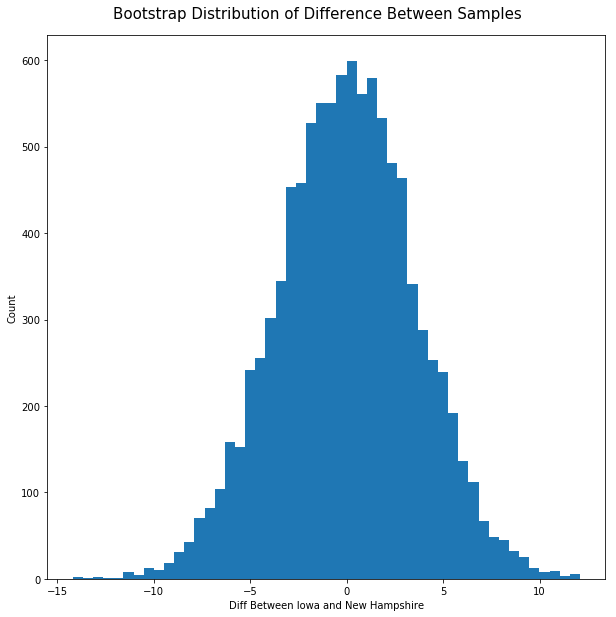

In [18]:
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=50)
plt.xlabel('Diff Between Iowa and New Hampshire')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distribution of Difference Between Samples', fontsize=15, y=0.92)

In [19]:
#P-Value
stats.percentileofscore(diff, 3.1739510939510946)

82.06

Note that the above shows us that our value has a p-value of 0.8206, rather than 82.06!

11. At a significance level of 0.05, what is the rejection cutoff for our null hypothesis? Given the observed difference that you found, can you reject the null hypothesis? (5 points)

In [20]:
#One-sided rejection region of H0
np.percentile(diff, 95)

5.784374999999998

We cannot reject the observed difference of 3.1739 since it's smaller than 5.7843

12. Now use the 'evaluate linear relationship' function to find the linear relationship between 'days' and the polling results for all four candidates in Iowa (run the function for each of the candidates separately). For which of the candidates does the linear relationship between the number of days since January 1st and that candidate's polling results in Iowa have the highest R-squared value? (6 points)

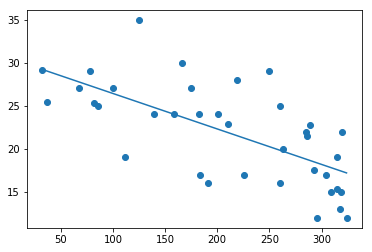

In [21]:
#Linear Relationship Biden
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(iowa['days'], iowa['Biden'])

def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(iowa['days'], iowa['Biden'])

plt.scatter(iowa['days'], iowa['Biden'])
sorted_order = np.argsort(iowa['days'])
plt.plot(iowa['days'][sorted_order], predictions[sorted_order])

In [22]:
utils.get_r2(predictions, iowa['Biden'])

0.44281443378472596

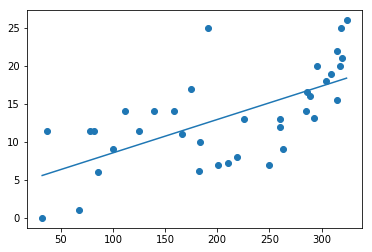

In [23]:
#Linear Relationship Buttigieg
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(iowa['days'], iowa['Buttigieg'])

def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(iowa['days'], iowa['Buttigieg'])

plt.scatter(iowa['days'], iowa['Buttigieg'])
sorted_order = np.argsort(iowa['days'])
plt.plot(iowa['days'][sorted_order], predictions[sorted_order])

In [24]:
utils.get_r2(predictions, iowa['Buttigieg'])

0.41869904061882235

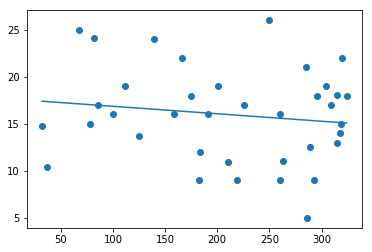

In [25]:
#Linear Relationship Sanders
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(iowa['days'], iowa['Sanders'])

def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(iowa['days'], iowa['Sanders'])

plt.scatter(iowa['days'], iowa['Sanders'])
sorted_order = np.argsort(iowa['days'])
plt.plot(iowa['days'][sorted_order], predictions[sorted_order])

In [26]:
utils.get_r2(predictions, iowa['Sanders'])

0.021222431676217925

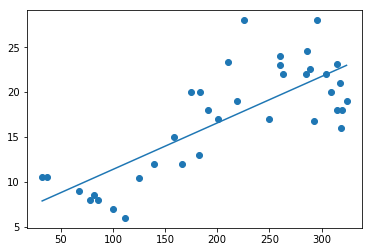

In [27]:
#Linear Relationship Warren
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(iowa['days'], iowa['Warren'])

def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

slope, intercept, predictions, residuals = evaluate_linear_relationship(iowa['days'], iowa['Warren'])

plt.scatter(iowa['days'], iowa['Warren'])
sorted_order = np.argsort(iowa['days'])
plt.plot(iowa['days'][sorted_order], predictions[sorted_order])

In [28]:
utils.get_r2(predictions, iowa['Warren'])

0.6078745823901934

Warren has the highest R-Squared value of 0.607874

13. For the linear relationship between the number of days since January 1st and the polling results for a given candidate, what does the intercept represent? And what does the slope represent? (5 points)

y = mx+b
The intercept is the value of the polling results when the day is not 0.
The slope is the intercept plus the polling results. Or another way of saying this is the linear relationship between days and polling results.

14. Given the linear models that you created for each candidate, which candidate has the highest polling results on January 1st, 2019?

Warren

15. The Iowa Democratic caucus will be held on February 3, 2020, or 398 days since January 1, 2019. Given the linear models that you created for each candidate, which candidate is projected to have the highest polling results on that date? (7 points)

Judging by the linear models created in Q10 and observing the slope, the candidate that's projected to have the highest polling result on 2/3/2020 is Warren.

BONUS: 

15) In New Hampshire, Bernie Sanders' polling results represent roughly a normal distribution with a mean of 18.97 and a standard deviation of 5.87.

Say that there are ten new polls coming out tomorrow. My null hypothesis is that the *mean* polling results for Bernie Sanders between these ten polls will come from this distribution. My alternate hypothesis is that the *mean* polling results for Bernie Sanders between these ten polls will not come from this distribution.

At the 0.05 signifiance level, what are the rejection cutoffs for which I can reject my null hypothesis? (5 points)